# **Object Recognition in Images using Convolutional Neural Networks**

Traditional neural networks usually do not perform well in the task of objection recognition which is the ability to identify objects in images. It is a difficult task due to the infinite number of possibilities and permutations of the lighting, positions of the objects etc.

We would be solving the problem using convolutional neural networks and compare its accuracy with an artificial neural network.

## **Importing Libraries and Loading CIFAR-10 Dataset**

We will be using keras to build the CNN and use it to classify the CIFAR-10 dataset. The dataset consists of 60000 images classfied into 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).
The images are coloured measuring 32 by 32 pixels square. The dataset is divided such as to 50000 images are used for training and the rest 10000 are used to evaluate the performance of the model.




In [ ]:
#importing the libraries

import keras 
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#loading the CIFAR-10 dataset and assigning variables

from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

## **Plotting a image**
We plot a few images from the dataset and show a 2 by 2 plot of images. We can make out that the images in the plot are frog, truck etc.

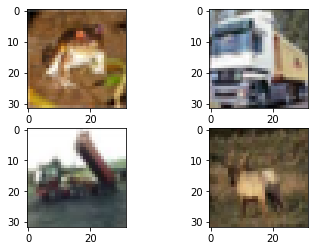

<Figure size 1080x144 with 0 Axes>

In [ ]:
#Displaying a few images
for index in range(0,4):
  plt.subplot(2,2,index+1)
  plt.imshow(X_train[index])

plt.figure(figsize = (15,2))
plt.show()


## **Data Preprocessing**

We first normalize the data so that values are between 0 and 1 and then one hot encode the output. Further we use data augmentation on the dataset to increse the accuracy of our model.



In [ ]:
#Normalizing the data
X_train=X_train/255.0
X_test=X_test/255.0

#One hot encoding the output
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


In [ ]:
#Shape of the the input 
X_train.shape


(50000, 32, 32, 3)

## **Simple ANN for classification**##
Firstly we build a simple artificial neural network for classfication of the dataset which will help us to compare the improvement of CNNs over an ANN for this problem. The ANN use has 2 hidden layer and 1 input and ouput layer. The number of nodes in the hidden layers are 2500 and the activation functions used are relu for the hidden layers and sigmoid for the last layer. We do not use the augmented data here.

In [ ]:
#ann model in which we flatten the input and then add2 hidden layers and use adam optimizer and cross entropy loss
model1 = Sequential()
model1.add(Flatten(input_shape=(32,32,3)))
model1.add(Dense(2500,activation="relu"))
model1.add(Dense(2500,activation="relu"))
model1.add(Dense(10,activation="sigmoid"))

model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
output=model1.fit(X_train,y_train,epochs=5,validation_data = (X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 172s 110ms/step - loss: 2.1467 - accuracy: 0.2823 - val_loss: 1.7607 - val_accuracy: 0.3684
Epoch 2/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.7208 - accuracy: 0.3791 - val_loss: 1.7018 - val_accuracy: 0.3870
Epoch 3/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.6135 - accuracy: 0.4197 - val_loss: 1.6197 - val_accuracy: 0.4250
Epoch 4/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.5646 - accuracy: 0.4408 - val_loss: 1.5713 - val_accuracy: 0.4358
Epoch 5/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.5447 - accuracy: 0.4456 - val_loss: 1.5351 - val_accuracy: 0.4506


The accuracy is found out to be **45.06%** at the end of 5 epochs.We can plot the accuracy on the training and validation set with the number of epochs. 

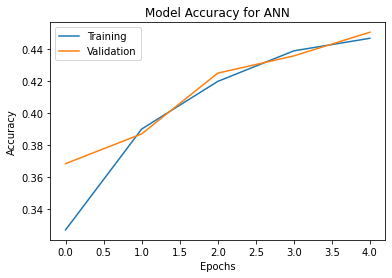

In [ ]:
#plot for accuracy vs epochs for ann
plt.plot(output.history["accuracy"])
plt.plot(output.history["val_accuracy"])
plt.title("Model Accuracy for ANN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training","Validation"],loc="best")
plt.show()

## **Convolutional Neural Network for classification**
Now we will use a convolutional neural network for classification. The structure of the network is that Convolution Layer,MaxPooling and Dropout layer with 32,64,128 feature maps. This is followed by flattening of input and a fully connected network with 2 hidden layers consisting of 128 and 256 nodes. The activation function in the convolution and hidden layers is relu and for the output layer is sigmoid.

In [ ]:
#Layer 1 of Convolution+Pooling+DropOut
model2=Sequential()
model2.add(Convolution2D(32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

#Layer 2
model2.add(Convolution2D(64,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

#Layer 3
model2.add(Convolution2D(128,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

#Flattening the input
model2.add(Flatten())

#Fully Conncted Network
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='sigmoid'))

#Optimizer is adam and loss is cross entropy
model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

#Summary of the architecture of the CNN model 
print(model2.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)        

In [ ]:
output2=model2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8666 - accuracy: 0.2906 - val_loss: 1.2856 - val_accuracy: 0.5361
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3244 - accuracy: 0.5230 - val_loss: 1.1308 - val_accuracy: 0.5950
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1770 - accuracy: 0.5833 - val_loss: 1.0706 - val_accuracy: 0.6176
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0933 - accuracy: 0.6180 - val_loss: 0.9594 - val_accuracy: 0.6625
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0347 - accuracy: 0.6376 - val_loss: 0.9094 - val_accuracy: 0.6788
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9832 - accuracy: 0.6581 - val_loss: 0.9592 - val_accuracy: 0.6646
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9504 - accuracy: 0.6659 - val_loss: 0.8888 -

The accuracy is found out to be **71.74%** at the end of 10 epochs and at the the end of 5 epochs was **67.88%** which is almost **20** points better than ANNs.


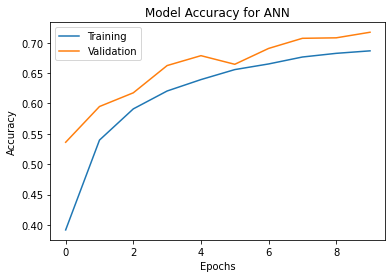

In [ ]:
#plot for accuracy vs epochs for cnn
plt.plot(output2.history["accuracy"])
plt.plot(output2.history["val_accuracy"])
plt.title("Model Accuracy for CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training","Validation"],loc="best")
plt.show()

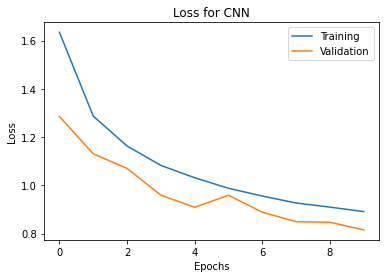

In [ ]:
#plot for loss vs epochs for cnn
plt.plot(output2.history["loss"])
plt.plot(output2.history["val_loss"])
plt.title("Loss for CNN")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training","Validation"],loc="best")
plt.show()